<h1>Breast_Cancer</h1>

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

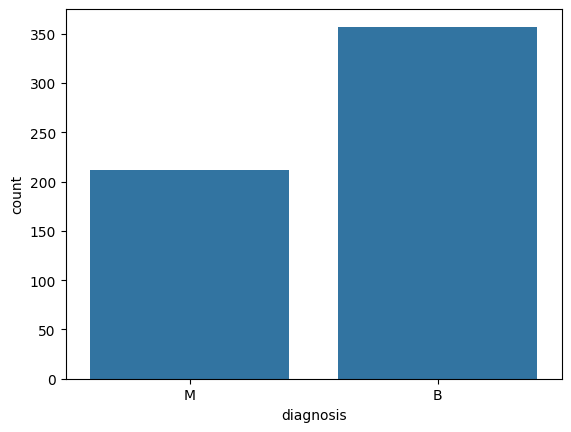

Accuracy Score: 0.9649122807017544
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", 
                "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", 
                "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", 
                "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", 
                "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
                "compactness_worst", "concavity_worst", "concave_points_worst", 
                "symmetry_worst", "fractal_dimension_worst"]

df = pd.read_csv(url, names=column_names)

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Visualize the data
sns.countplot(x='diagnosis', data=df)
plt.show()

# Split the data into features (X) and target (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))